In [1]:
from shapes import Point, Rectangle
from environment import Environment2D
from utils import PlotTools
from graph import Graph
from lqr import LQRPlanner
from simulate import Simulator

import matplotlib.pyplot as plt
import numpy as np
import polytope as pc
%load_ext autoreload
%autoreload 2

`polytope` failed to import `cvxopt.glpk`.
will use `scipy.optimize.linprog`


In [2]:
def generate_waypoints(A, B, x_0, u_nom):
    T = u_nom.shape[0]
    x_nom = np.zeros((T, A.shape[0]))
    x_nom[0] = x_0
    for t in range(1, T):
        x_nom[t] = np.dot(A, x_nom[t - 1]) + np.dot(B, u_nom[t - 1])
    return x_nom

# Env 1

In [67]:
x_lims = [-10,10]
y_lims = [-5,5]
env = Environment2D(x_lims, y_lims)

rec_0 = Rectangle(0, -6.5,-3,3,5,0)
rec_1 = Rectangle(1, 1,-1,3,3,0)
rec_2 = Rectangle(2, -10,5,20,1,0)
rec_3 = Rectangle(3, -10,-6.5,20,1,0)

# rec_0.set_error_bounds(np.array([0,0,0,0]), np.array([0,1.5,1.5,0]))
# rec_1.set_error_bounds(np.array([0,0,0,0]), np.array([0,0,1.5,1.5]))
# rec_2.set_error_bounds(np.array([0,0,0,0]), np.array([0.5,0,0,0]))

# rec_0.set_actual_errors(np.array([0,1.3,1.2,0]))
# rec_1.set_actual_errors(np.array([0,0,1.2,0.9]))
# rec_2.set_actual_errors(np.array([0.3,0,0,0]))

env.add_rectangles([rec_0, rec_1, rec_2, rec_3])
# env.add_rectangles([rec_0, rec_1, rec_3])

In [68]:
dt = 0.2
A = np.eye(2); B = dt*np.eye(2)
Q_lqr = 10*np.eye(2)
R_lqr = np.eye(2)
lqr_planner = LQRPlanner(Q_lqr, R_lqr, A, B)

Q = np.eye(2) * 0.1
R = 0.1
T = 280
u_noms = np.zeros((T - 1, 2))
for t in range(T - 1):
    u_noms[t] = [0.3, 0]
x0 = [-9, 3.8]
x_noms = generate_waypoints(A, B, x0, u_noms)

x_est_0 = x0
P_est_0 = np.eye(2)

sim = Simulator(env)
sim.set_motion(A, B, Q)
sim.set_obs(R)
sim.set_gain(lqr_planner.lqr_gain)
sim.set_init_est(x_est_0, P_est_0)

In [69]:
# xs = sim.rollout(x0, x_noms, u_noms)

In [73]:
num_iters = 1
xs = sim.run(num_iters, x0, 0.0*np.eye(2), x_noms, u_noms)

100%|██████████| 1/1 [00:02<00:00,  2.62s/it]


In [66]:
lqr_planner.lqr_gain

array([[2.31662, 0.     ],
       [0.     , 2.31662]])

In [53]:
# sim.plot_trajs(xs, x_noms)

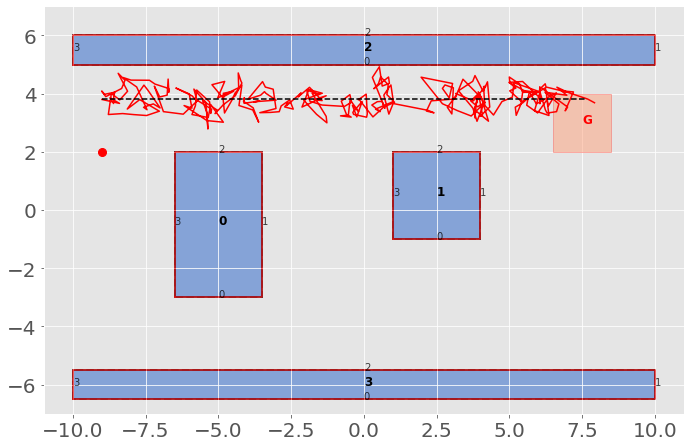

In [74]:
env.plot()
x_start = Point(-9, 2)
x_start.plot()
goal_region = Rectangle(-1, 6.5,2,2,2,0)
goal_region.plot(as_goal=True)
sim.plot_trajs(xs, x_noms)

# Env 2

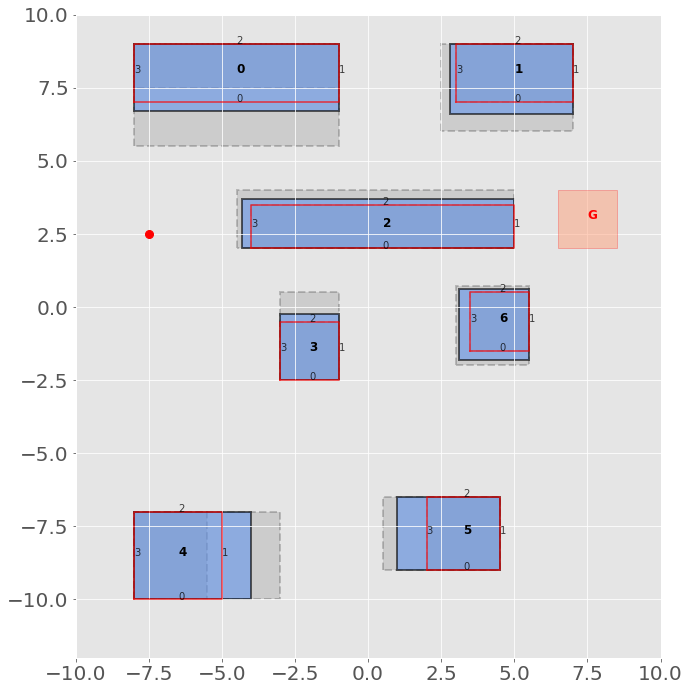

In [37]:
x_lims = [-10,10]
y_lims = [-12,10]
env = Environment2D(x_lims, y_lims)

rec_0 = Rectangle(0, -8,7,7,2,0)
rec_1 = Rectangle(1, 3,7,4,2,0)
rec_2 = Rectangle(2, -4,2,9,1.5,0)
rec_3 = Rectangle(3, -3,-2.5,2,2,0)
rec_4 = Rectangle(4, -8,-10,3,3,0)
rec_5 = Rectangle(5, 2,-9,2.5,2.5,0)
rec_6 = Rectangle(6, 3.5,-1.5,2,2,0)

rec_0.set_error_bounds(np.array([-0.5,0,0,0]), np.array([1.5,0,0,0]))
rec_1.set_error_bounds(np.array([0,0,0,0]), np.array([1,0,0,0.5]))
rec_2.set_error_bounds(np.array([0,0,0,0]), np.array([0,0,0.5,0.5]))
rec_3.set_error_bounds(np.array([0,0,0,0]), np.array([0,0,1,0]))
rec_4.set_error_bounds(np.array([0,-0.5,0,0]), np.array([0,2,0,0]))
rec_5.set_error_bounds(np.array([0,0,0,0]), np.array([0,0,0,1.5]))
rec_6.set_error_bounds(np.array([0,0,0,0]), np.array([0.5,0,0.2,0.5]))

rec_0.set_actual_errors(np.array([0.3,0,0,0]))
rec_1.set_actual_errors(np.array([0.4,0,0,0.2]))
rec_2.set_actual_errors(np.array([0,0,0.2,0.3]))
rec_3.set_actual_errors(np.array([0,0,0.25,0]))
rec_4.set_actual_errors(np.array([0,1,0,0]))
rec_5.set_actual_errors(np.array([0,0,0,1]))
rec_6.set_actual_errors(np.array([0.3,0,0.1,0.4]))

env.add_rectangles([rec_0, rec_1, rec_2, rec_3, rec_4, rec_5, rec_6])

env.plot()
x_start = Point(-7.5, 2.5)
x_start.plot()
goal_region = Rectangle(-1, 6.5,2,2,2,0)
goal_region.plot(as_goal=True)